<div class="alert alert-block alert-warning">
    
# Assignment

Welcome to your task 1 of the assignment! This notebook contains all the code and comments that you need to submit. The places where you need to edit are highlighted in red. Feel free to add in your own markdown for additional comments.

__Submission details: make sure you all your outputs have been generated. Submit this Jupyter Notebook.__

<b>Enter you student details below</b>

- <b>Student Name:</b> Lucas Liu
- <b>Student ID:</b> 31445179   

<div class="alert alert-block alert-danger">

# Table of Contents

* [Task 1.1: Iterative weighted linear regression](#t1_1)
    
* [Task 1.2: Using non-linear features and learning rate decay for better classification](#t1_2)


<div class="alert alert-block alert-warning">

# Libraries 

Libraries are important as it saves us time from writing our own functions all the time such as graphing, or creating matrices. Brief library descriptions have been added for every library that we import. You may also check the official documentations for more details.

The required libraries are specified in this notebook for you.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">


# Before you begin

Ensure that you use __numpy__ or __torch__ efficiently instead of nested for loops to perform tensor multiplications. For example, if you are doing a 4x4 tensor multiplied with a 4x4 tensor using numpy, you should use np.matmul instead of 2 for loops. We highly recommend using __numpy__ for the entire task 1, as you will resuse some of the numpy code from the labs.


# Linear and logistic regression

In this task, you will be furthering your implementations with linear and logistic regression. This builds off your previous lab and aims to explore further possibilities with these models in both numerical estimation and classification tasks.

<div class="alert alert-block alert-info">

# Task 1.1 - Iterative weighted linear regression <a class="anchor" id="t1_1"></a>

In some problems, every data point might not have the same importance. Having weights associated to samples will provide us with a principal way to model such problems. Consider a data set in which each data point $(x_i, y_i)$, $x_i \in \mathbb{R}^n$, $y_i \in \mathbb{R}$ is associated with a weighting factor $0 < \alpha_i ≤ 1$. Define the loss of a linear model with parameters $w \in \mathbb{R}^n$ as the weighted sum-of-squares error:

$$ \mathcal{L}_{\mathrm{wSE}}(\boldsymbol{w})=\frac{1}{m}\sum_{i=1}^{m}\alpha_i(w^\top x_i - y_i)^2 $$

It can be shown that the optimal weights can be obtained as: 

$$ w^* = (X^\top A X)^{-1}X^\top A Y $$

Here, $X$ is a matrix of size $m × n$ where every row is one input sample (i.e., row $i$ in $X$ is $x_i$). Similarly, $Y$ is an m dimensional vector storing $y_i$ and $A$ is a diagonal matrix of size $m × m$ with $A[i, i] = \alpha_i$.

The purpose of this task is to train an iterative linear regression model that will weight the samples as the model is being trained. You need to develop the mechanism to weigh each sample as the model is being iteratively trained. Here, the diagonal matrix $A$ is updated by using the following equation:

$$ \hat{\alpha_i} = exp(-\sigma||y_i^{noisy} - \hat{y_i}||^2) $$

,where $\sigma$ is a hyperparemeter you can tune.

## (a) Developing a generic function for (weighted) linear regression

In [3]:
# This weighted least squares function can be used for both weighted least squares
# or a vanilla linear regression model.

# "X,Y" inputs are required by the user
# The input "A" can be defaulted to an identity matrix which would result in a vanilla linear regression model
# The output will be the least square's calculated coefficients
# It is recommended you use the least squares formula which has been derived in the lectures when calculating your linear regression coefficients


def weighted_LS(X, Y, A=None):
    if A is None:
        A = np.identity(X.shape[0])
    w = np.linalg.inv(X.T @ A @ X) @ X.T @ A @ Y

    return w


# Function to calculate the error
# We are using least squares to calculate error (i.e., MSE)
# This is basically the euclidean distance for the error measure


def error_linear_model(X, w, Y):

    # Define MSE loss
    loss = np.mean((w.T @ X - Y) ** 2)

    return loss

## (b) Iterative weighted linear regression

Load the data: _Task1_1.npz_

In [2]:
# Data was saved in a dictionary-liked form, where the keys are ('arr_0','arr_1')
# Load the values into correct variables according to the following mapping.
# X_trn <-- X_trn
# Y_trn <-- Y_trn
# X_val <-- X_val
# Y_val <-- Y_val

data = np.load("data/Task1_1.npz")

X_trn = data["X_trn"]
Y_trn = data["Y_trn"]
X_val = data["X_val"]
Y_val = data["Y_val"]

Visualise the train and validation data. Using a scatter plot, plot train data with red dots, validation data with blue dots. Remember to put title and x, y labels, legend for your plot.

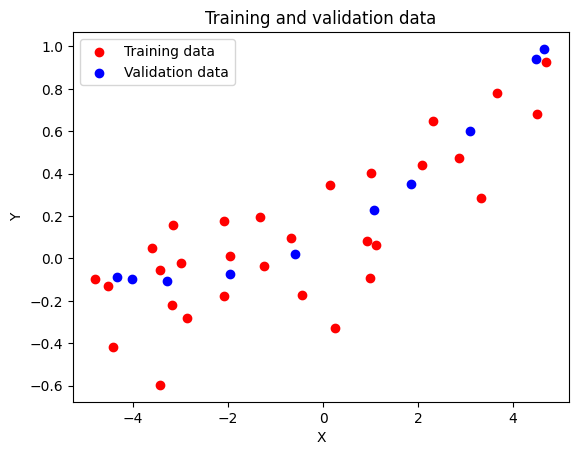

In [47]:
# Visualise the data.

plt.figure()
plt.scatter(X_trn, Y_trn, color="red")
plt.title("Training and validation data")
plt.scatter(X_val, Y_val, color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["Training data", "Validation data"])
plt.show()

Since the data is non-linear, let's create non-linear features with the mapping: $ x_{aug} = [1, x, x^2, 1/x] $ for both train and validation data.

In [8]:
# Create non-linear features, do it for both train and validation data

x_trn_aug = np.vstack([np.ones(X_trn.shape), X_trn, X_trn**2, 1 / X_trn]).T
x_val_aug = np.vstack([np.ones(X_val.shape), X_val, X_val**2, 1 / X_val]).T

Implement iterative weighted linear regression. You have to tune $\sigma$ and $max\_iter$ yourself.

In [75]:
# Iteratively fit the model

max_iter = 1000
a = np.identity(x_trn_aug.shape[0])
sigma = 22
for num_iter in range(max_iter):
    # Fit a weighted linear regression model
    w = weighted_LS(x_trn_aug, Y_trn, a).reshape(-1, 1)

    # Calculate MSE of the model on validation samples
    old_err = err_val
    err_val = error_linear_model(x_val_aug.T, w, Y_val)
    print(f"Error at iteration {num_iter}: {err_val:.4f}")
    if np.abs(old_err - err_val) < 0.00001:
        print("early stop")
        break

    # Obtain the weight of the train samples
    y_hat = w.T @ x_trn_aug.T
    for i in range(len(Y_trn)):
        a[i, i] = np.exp(-sigma * (Y_trn[i] - y_hat[0, i]) ** 2)

Error at iteration 0: 0.0080
Error at iteration 1: 0.0055
Error at iteration 2: 0.0048
Error at iteration 3: 0.0043
Error at iteration 4: 0.0041
Error at iteration 5: 0.0041
Error at iteration 6: 0.0041
early stop


Now let's visualise the estimated **train data after being weighted**. Plot the original train samples in blue and the weighted samples after passing them into the model in red.

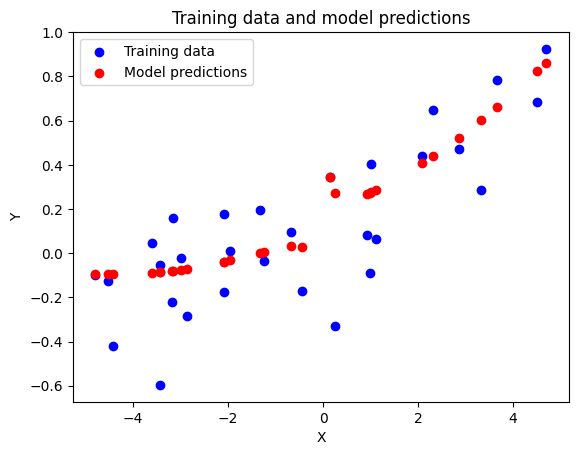

In [76]:
# Plot results.

plt.figure()
plt.scatter(X_trn, Y_trn, color="blue")
plt.title("Training data and model predictions")
plt.scatter(X_trn, w.T @ x_trn_aug.T, color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["Training data", "Model predictions"])
plt.show()

<div class="alert alert-block alert-info">
    
# Task 1.2 - Using non-linear features and learning rate decay for better classification <a class="anchor" id="t1_2"></a>

You have been given a set of samples $x = (x_1,x_2)^\top \in \mathbb{R}^2$. In this task, you will apply the knowledge you learned from lab 2 to train a logistic model via Gradient Descent and try to improve the performance by implementing the decaying learning rate.

__Instructions:__

a. Copy any functions from Lab 2. The 3 functions you will need are: sigmoid(), predict(), compute_loss_and_grad()

b. Load and visualise data

c. Apply nonlinear transformation

d. Train the model using GD

e. Visualise the decision boundary

f. Write a decaying learning rate function

g. Train the model with decaying learning rate

## (a) Copy the required functions from lab 2 (if they were functional)

In [ ]:
# Implement the sigmoid function
def sigmoid(x):

    ???

    return ???

# Write a prediction function -> We predict the output class probability, NOT the class label (no 0,1 rounding)
def predict(X, w):
    
    ???

    return ???

def compute_loss_and_grad(X, y, y_hat):



    ???



    return ???

## (b) Load and visualise data

In [ ]:
# Load numpy dataset from Task1_2.npz
loaded_data_task4 = np.load("data/Task1_2.npz")

# Create train and test datasets
# (X_train--> arr_0, X_test--> arr1_, Y_train_circle--> arr_2, Y_test_circle--> arr_3)
X_train = loaded_data_task4["arr_0"]
X_test = loaded_data_task4["arr_1"]
Y_train_circle = loaded_data_task4["arr_2"]
Y_test_circle = loaded_data_task4["arr_3"]

In [ ]:
# Visualize non-linear features for both train and test data
# Create two plots side-by-side (Use subplots). Use scatter plots and show samples in different classes with different colours. The samples are 2-dimensional.

???

## (c) Apply nonlinear transformation

Let's map the samples with $x_{trans}=[x_1, x_2, x_1^2, x_2^2, x_1x_2, 1]$

In [ ]:
# Apply nonlinear mapping

???

## (d) Train the model using GD

In [ ]:
# Set a random seed (Do not change!) ==============
np.random.seed(0)
# =================================================

lr=1.0 # Set the learning to be 1.0
num_epochs = 10000 # Train for 10000 epochs

loss = np.zeros(num_epochs)
theta = ??? # Initialise theta

for ep in range(num_epochs):

    # Apply gradient descent here and record loss

    ???


# Evaluate the classification accuracy for training and test data

???


print("Training accuracy: {:.3f}".format(???))
print("Test accuracy: {:.3f}".format(???))


## (e) Visualise the Decision Boundary

In [ ]:
# You can use meshgrid and linearly spaced points to plot the decision boundary
# You may choose other ways to plot the decision boundary

xx=np.linspace(-2,2,1000)
yy=np.linspace(-2,2,1000)
[X2,Y2]=np.meshgrid(xx,yy)

???

## (f) Write a decaying learning rate function

In [ ]:
# Write a simple function to decrease current learning rate by 0.1% in each epoch
def decaying_lr(lr):
    
    
    return ??? # return the new learning rate

## (g) Train the model with decaying learning rate

In [ ]:
# Set a random seed (Do not change!) ==============
np.random.seed(0)
# =================================================

lr=1.0 # Set initial learning rate to 1.0
num_epochs = 10000 # Train for 10000 epochs

loss = np.zeros(num_epochs)
theta = ??? # Initialise theta
    
for ep in range(num_epochs):
    
    # Apply gradient descent here and record loss

    # Apply learning rate decay here

    

# Evaluate the classification accuracy for training and test data

???


print("Training accuracy: {:.3f}".format(???))
print("Test accuracy: {:.3f}".format(???))

<div class="alert alert-block alert-success">

## 1.3 Discussion  <a class="anchor" id="t1_3"></a>

1. What do you notice about the outliers for the implementations weighted linear regression?
    
2. In what situations, you may want to use higher dimensional features? (Answer in terms of decision boundary)

3. Why is it important to augment the bias term for this non-linear transformation? What does it actually do to the decision boundary?

4. What is the aim of applying decay in learning rate? 
    
## Answer
    
1. 

2. 

3. 

4. 